In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fb = pd.read_csv ('fb.csv', index_col = 'Date')

In [4]:
fb['MA10'] = fb['Close'].rolling(10).mean()
fb['MA50'] = fb['Close'].rolling(50).mean()
fb = fb.dropna()
fb.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
2012-07-30,24.000000,24.040001,23.030001,23.150000,23.150000,29285900,27.521,29.8390
2012-07-31,23.370001,23.370001,21.610001,21.709999,21.709999,56179400,26.883,29.5086
2012-08-01,21.500000,21.580000,20.840000,20.879999,20.879999,44604400,26.060,29.2456
2012-08-02,20.770000,20.840000,19.820000,20.040001,20.040001,56374500,25.164,29.0264
2012-08-03,20.360001,22.160000,19.900000,21.090000,21.090000,80647000,24.397,28.8082


In [5]:
#Decide whether to long or not based on this MA Strategy
fb['Shares'] = [1 if fb.loc [i, 'MA10'] > fb.loc[i,'MA50'] else 0 for i in fb.index]

In [6]:
fb['Close1'] = fb['Close'].shift(-1)
fb['Profit'] = [fb.loc[i, 'Close1'] - fb.loc[i, 'Close'] if fb.loc[i, 'Shares']==1 else 0 for i in fb.index]

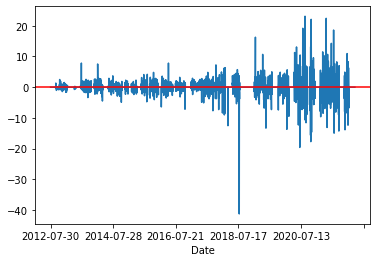

In [7]:
fb['Profit'].plot()
plt.axhline(y=0, color = 'red')

In [8]:
fb['Wealth'] = fb['Profit'].cumsum()

<AxesSubplot:xlabel='Date'>

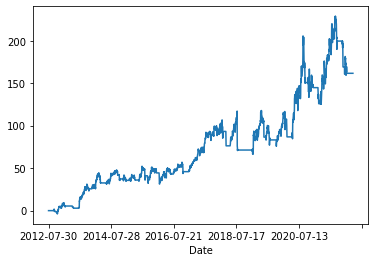

In [9]:
fb['Wealth'].plot()

In [40]:
profit =round (fb.loc[fb.index[-2], 'Wealth'],2)
profit

161.62